In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv(r'C:\Kenil Ramani\QB\GoalBot\CSV\dataset_v4.04.csv')

In [38]:
# df = df[df['productId'].notna()]

In [39]:
df.isna().sum()

salesId                           0
invoiceId                         0
invoiceDate                       0
quarter                           0
month                             0
year                              0
day_of_week                       0
day_of_month                      0
day_of_year                       0
week_of_year                      0
stockistId                    25719
chemistId                    103457
billAmount                        0
salesDetails_Id                   0
productCode                       0
productName                       0
productId                         0
mrp                               0
rate                              0
batch                             0
expiryDate                        0
qty                               0
free                              0
amount                            0
cashDiscountPercentage            0
productDiscountPercentage         0
productDiscount                   0
extraSchemePercentage       

In [40]:
df.shape

(129176, 49)

In [41]:
df['amount'] = df['amount'].round().astype('int64')

In [42]:
# dff = df[df['productId']==186]
# dff

In [43]:
df

,salesId,invoiceId,invoiceDate,quarter,month,year,day_of_week,day_of_month,day_of_year,week_of_year,...,contents,packingTypeId,divisionId,cityId,regionId,name,addressId,hqId,categoryId,chemistTypeId
0,772,DB-T-1218,7/11/2022,3,7,2022,2,11,192,29,...,Amlodipine 5 mg Tab + Metoprolol Succinate 50 ...,28,3,22.0,NaN,STAR MEDICINES,83076.0,1.0,258.0,1.0
1,357,DB-T-11,4/1/2023,2,4,2023,7,1,91,13,...,Amlodipine 5 mg Tab + Metoprolol Succinate 50 ...,28,3,22.0,NaN,STAR MEDICINES,83076.0,1.0,258.0,1.0
2,655,DB-T-1185,7/4/2023,3,7,2023,3,4,185,27,...,Amlodipine 5 mg Tab + Metoprolol Succinate 50 ...,28,3,22.0,NaN,STAR MEDICINES,83076.0,1.0,258.0,1.0
3,2175,DB-T-162,4/12/2023,2,4,2023,4,12,102,15,...,Amlodipine 5 mg Tab + Metoprolol Succinate 50 ...,28,3,22.0,NaN,STAR MEDICINES,83076.0,1.0,258.0,1.0
4,432,DB-T-112,4/5/2024,2,4,2024,6,5,96,14,...,GLIMEPIRIDE 1 MG + METFORMIN 500 MG SR TAB,28,3,66.0,NaN,VARSHA PHARMACY,74567.0,45.0,259.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129171,1796,DB-T-151,4/9/2024,2,4,2024,3,9,100,15,...,FUROATE 27.5MCG,45,3,77.0,1.0,Tollyjoy Distributor,56125.0,17.0,NaN,NaN
129172,56160,DB-T-3650,12/12/2024,4,12,2024,5,12,347,50,...,Rabeprazole Sodium 20 mg Tab + Demperidone 30 ...,42,3,474.0,NaN,SHREEJI PHARMACY- NANDURBAR,93924.0,20.0,258.0,1.0
129173,56160,DB-T-3650,12/12/2024,4,12,2024,5,12,347,50,...,Levoceterizine 5mg,28,1,474.0,NaN,SHREEJI PHARMACY- NANDURBAR,93924.0,20.0,258.0,1.0
129174,56390,DB-T-3884,12/30/2024,4,12,2024,2,30,365,53,...,Bilastine 20 Mg Tab + Montelukast Sodium 10 mg...,28,3,22.0,NaN,DR.MADHAV PUROHIT,65694.0,8.0,NaN,NaN


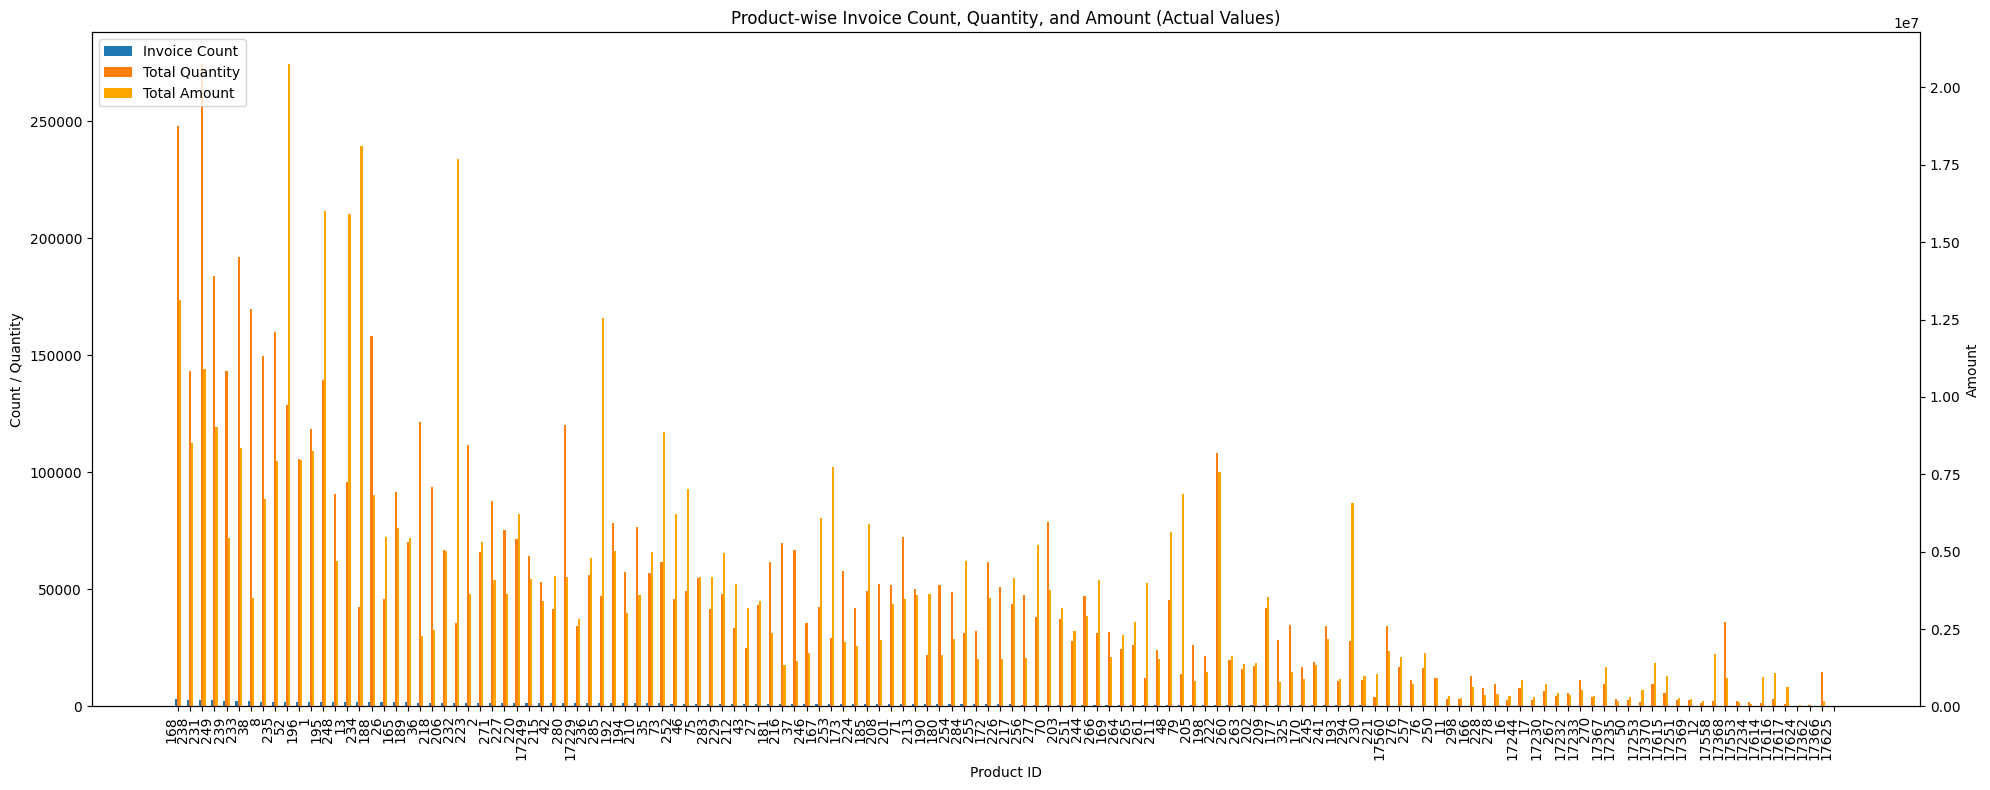

In [44]:

# Step 1: Aggregate data
agg_df = df.groupby('productId').agg(
    invoice_count=('invoiceDate', 'count'),
    total_qty=('qty', 'sum'),
    total_amount=('amount', 'sum')
).reset_index()

# Optional: Sort by invoice_count and pick top N to avoid overcrowding
top_n = 156
agg_df = agg_df.sort_values('invoice_count', ascending=False).head(top_n)

# Step 2: Plotting with twin y-axis
x = np.arange(len(agg_df['productId']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(20, 8))

# First axis for invoice count and quantity
ax1.bar(x - width/2, agg_df['invoice_count'], width=width/2, label='Invoice Count')
ax1.bar(x, agg_df['total_qty'], width=width/2, label='Total Quantity')
ax1.set_ylabel('Count / Quantity')
ax1.set_xlabel('Product ID')
ax1.set_xticks(x)
ax1.set_xticklabels(agg_df['productId'], rotation=90, ha='right')

# Second axis for amount
ax2 = ax1.twinx()
ax2.bar(x + width/2, agg_df['total_amount'], width=width/2, label='Total Amount', color='orange')
ax2.set_ylabel('Amount')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Product-wise Invoice Count, Quantity, and Amount (Actual Values)')
plt.tight_layout()
plt.show()


All 3

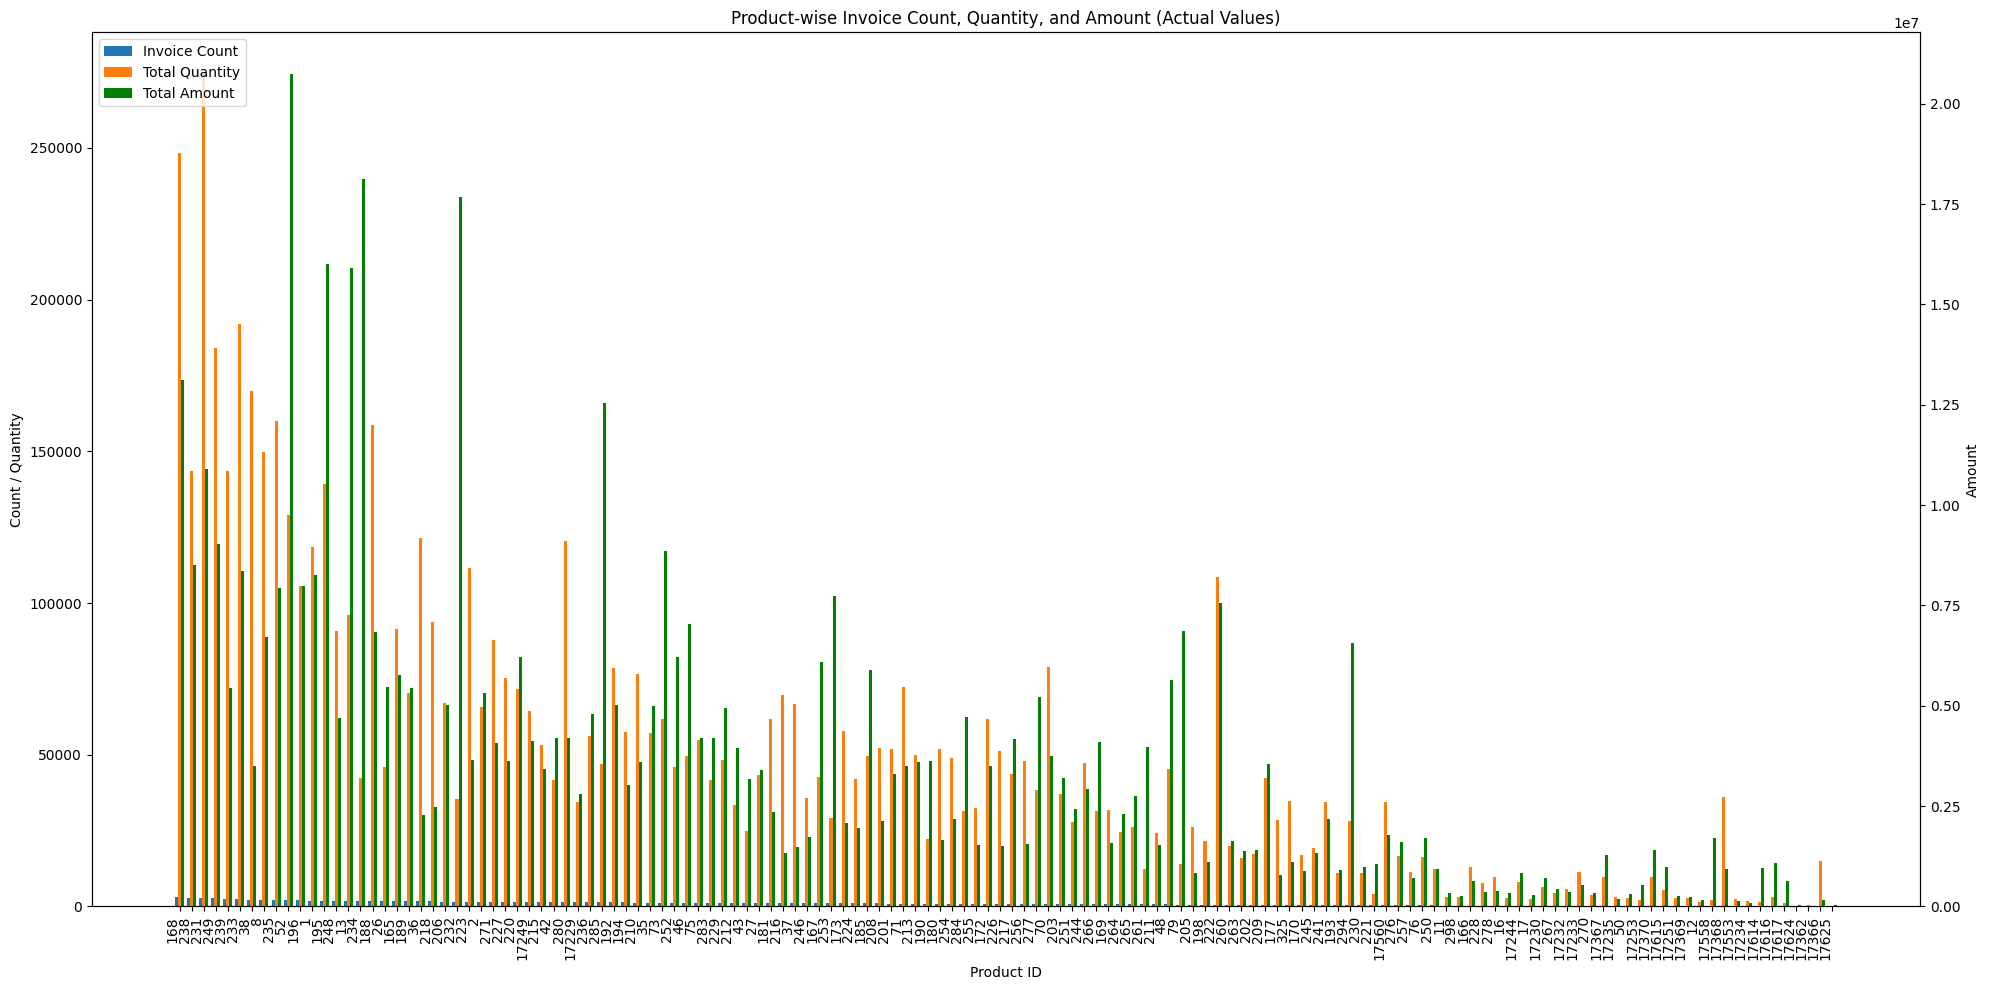

In [45]:
# Step 1: Group and aggregate from actual df
agg_df = df.groupby('productId').agg(
    invoice_count=('invoiceDate', 'count'),
    total_qty=('qty', 'sum'),
    total_amount=('amount', 'sum')
).reset_index()

# Step 2: Sort by invoice count and take top N for clarity
top_n = 156
agg_df = agg_df.sort_values('invoice_count', ascending=False).head(top_n)

# Step 3: Use actual productId values (numeric) for x-axis labels
product_ids = agg_df['productId'].tolist()
x = np.arange(len(product_ids))
width = 0.25

# Step 4: Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot invoice count and qty
ax1.bar(x - width, agg_df['invoice_count'], width=width, label='Invoice Count')
ax1.bar(x, agg_df['total_qty'], width=width, label='Total Quantity')
ax1.set_ylabel('Count / Quantity')
ax1.set_xlabel('Product ID')
ax1.set_xticks(x)
ax1.set_xticklabels(product_ids, rotation=90, ha='right')

# Plot amount on second y-axis
ax2 = ax1.twinx()
ax2.bar(x + width, agg_df['total_amount'], width=width, label='Total Amount', color='green')
ax2.set_ylabel('Amount')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Product-wise Invoice Count, Quantity, and Amount (Actual Values)')
plt.tight_layout()
plt.show()


Amount

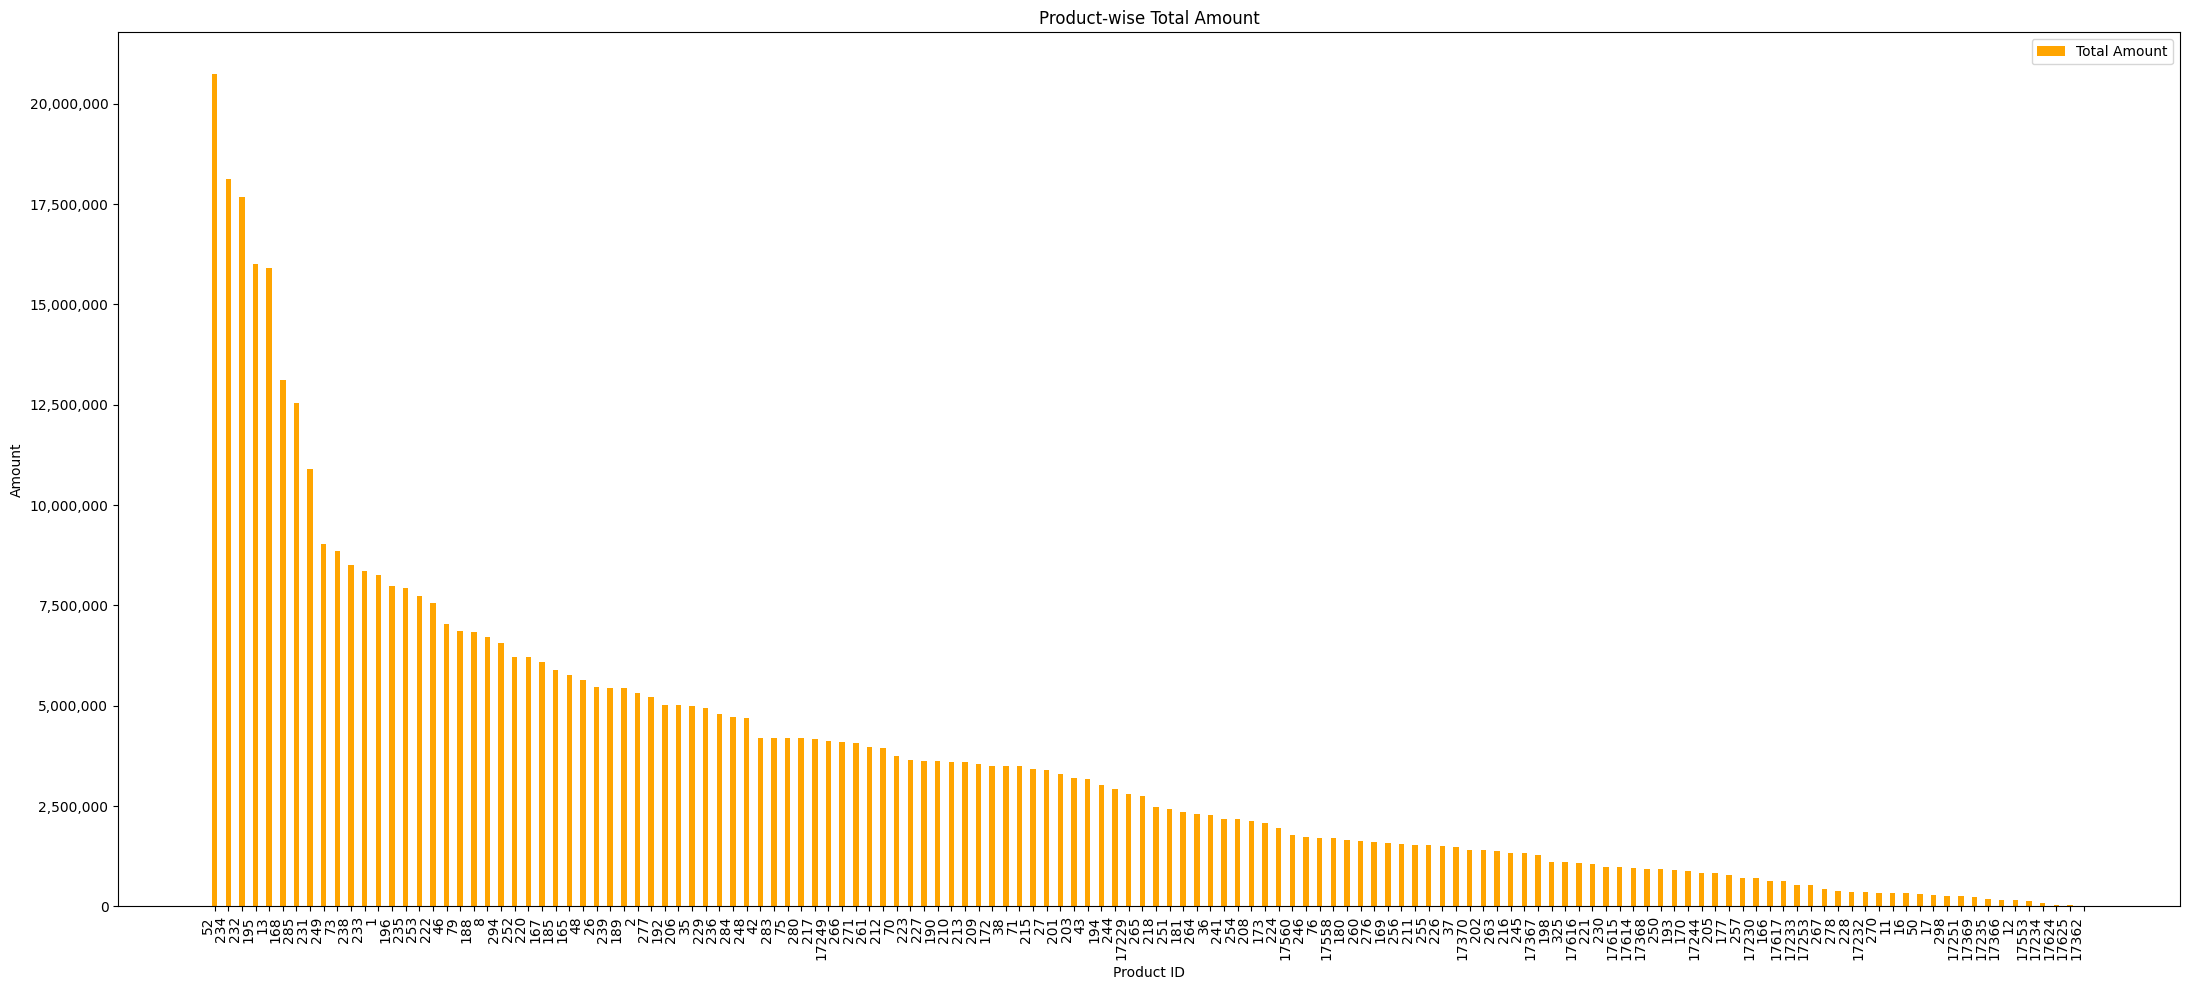

In [47]:
agg_df = df.groupby('productId').agg(
    total_amount=('amount', 'sum')
).reset_index()

top_n = 156
agg_df = agg_df.sort_values('total_amount', ascending=False).head(top_n)

product_ids = agg_df['productId'].tolist()
x = np.arange(len(product_ids))
width = 0.4

fig, ax = plt.subplots(figsize=(22, 10))
ax.bar(x, agg_df['total_amount'], width=width, color='orange', label='Total Amount')

ax.set_xlabel('Product ID')
ax.set_ylabel('Amount')
ax.set_title('Product-wise Total Amount')
ax.set_xticks(x)
ax.set_xticklabels(product_ids, rotation=90, ha='right')
ax.legend()

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))

plt.tight_layout()
plt.show()
